# Diagnostic Visualization demo

In this demo, we want to demonstrate how to use the plotting utilities to visualize the posterior samples of Orbit MCMC models. Those could be very useful in practice when checking the convergence of MCMC.

In [1]:
import pandas as pd
import numpy as np
from orbit.lgt import LGT
from orbit.utils.plot import plot_posterior_params

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## load data

In [2]:
DATA_FILE = "./data/iclaims_example.csv"
raw_df = pd.read_csv(DATA_FILE, parse_dates=['week'])
raw_df.dtypes

week              datetime64[ns]
claims                     int64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
dtype: object

In [3]:
raw_df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,651215,1.183973,0.720140,1.119669
1,2010-01-10,825891,1.183973,0.814896,1.178599
2,2010-01-17,659173,1.203382,0.739091,1.119669
3,2010-01-24,507651,1.164564,0.814896,1.107883
4,2010-01-31,538617,1.086926,0.776993,1.072525


In [4]:
df=raw_df.copy()
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

## Fit a Model

In [5]:
DATE_COL="week"
RESPONSE_COL="claims"
REGRESSOR_COL=['trend.unemploy', 'trend.filling', 'trend.job']

In [6]:
lgt_mcmc = LGT(
    response_col=RESPONSE_COL,
    date_col=DATE_COL,
    regressor_col=REGRESSOR_COL,
    regressor_sign=["+", '+', '='], 
    seasonality=52,
    seed=1,
    num_warmup=900,
    num_sample=100,
    predict_method='full',
    sample_method='mcmc',
    is_multiplicative=True
)

## Posterior Diagnostic Viz

In [7]:
lgt_mcmc.fit(df=train_df)
_ = lgt_mcmc.predict(df=test_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


### density/histogram

If you see certain warning message related to `scipy`, which can be resolved by upgrading to `scipy>=1.2` for python >= 3.6.

You can specify a path string (e.g., './density.png') to save the chart.

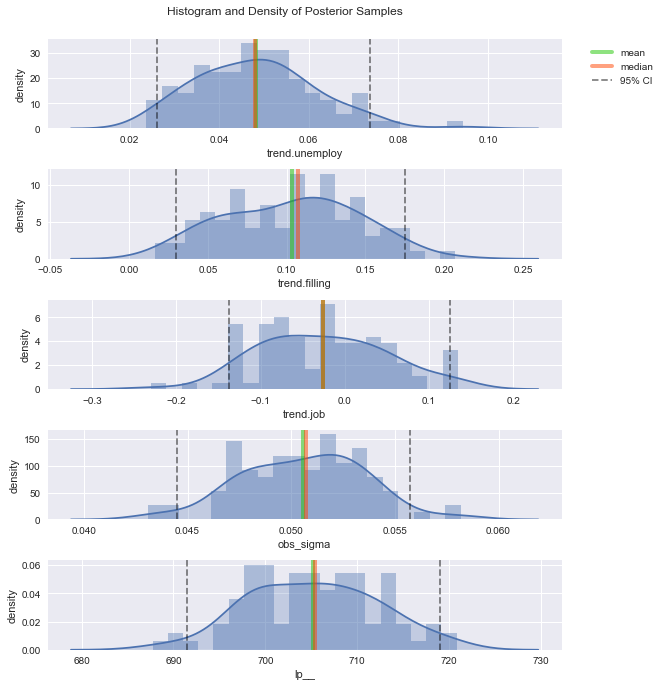

In [8]:
_ = plot_posterior_params(lgt_mcmc, kind='density')

### trace

Currently, trace plot may not represent the actual sample process for different chainse since this information is not stored in orbit model objects.

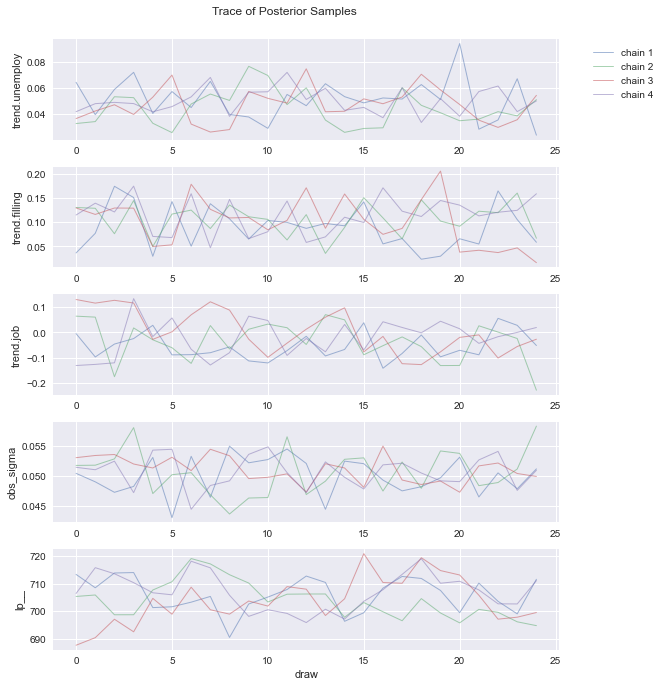

In [9]:
_ = plot_posterior_params(lgt_mcmc, kind='trace')

### pair plot

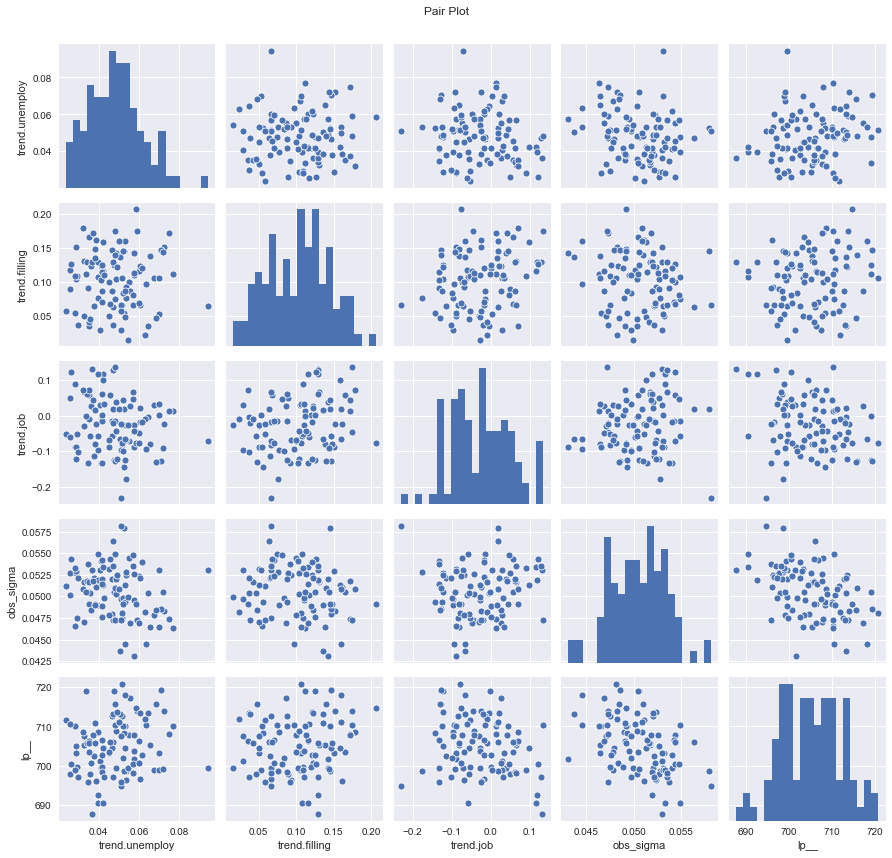

In [10]:
_ = plot_posterior_params(lgt_mcmc, kind='pair', pair_type='scatter')

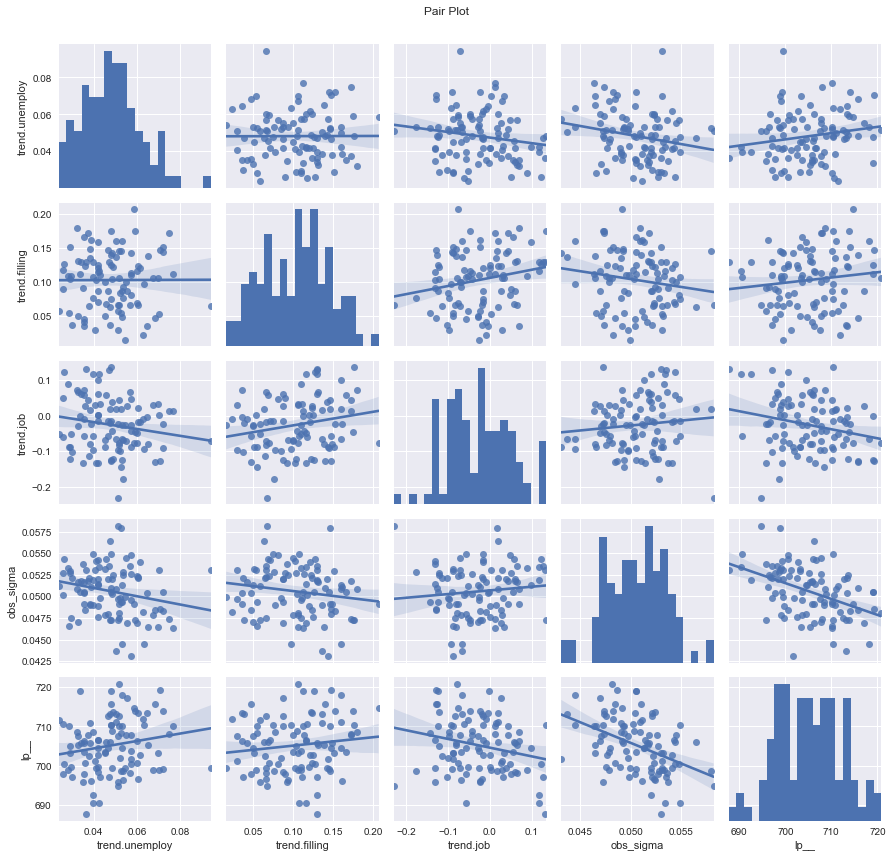

In [11]:
_ = plot_posterior_params(lgt_mcmc, kind='pair', pair_type='reg')